## General instructions

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel/runtime** (Colab: in the menubar, select *Runtime*$\rightarrow$*Factory Reset Runtime*; Jupyter: in the menubar, select *Kernel*$\rightarrow$*Restart*) and then **run all cells** (Colab: in the menubar, select *Runtime*$\rightarrow$*Run all*; Jupyter: in the menubar, select *Cell*$\rightarrow$*Run All*).

Make sure you fill in any place that says `YOUR CODE HERE` or `"YOUR ANSWER HERE"`, as well as the list of the group members in the following cell.

Enter here the *Group Name* and the list of *Group Members*.

`Doi eletronics`

`Burco Lorenzo, Persello Riccardo`

In order to be able to have an evaluation DO NOT delete/cut the cells with code and answers. Once you have finished you can downolad the notebook (Colab: in the menubar, select *File*$\rightarrow$*Download .ipynb*; Jupyter: in the menubar, select *File*$\rightarrow$*Download as*$\rightarrow$*Notebook (.ipynb)*) and upload as an assignment on the e-learning platform.

The following cell will load the Google Drive extension for the current notebook, when the variable `MOUNT` is `True`. This allow you to mount the Google Drive filesystem for file persistence. The mountpoint will be `/content/gdrive`.
Furthermore, it will set the `PATH` variable, from now on, so that if you have to refer to external files you could do that by writing:

```python
os.path.join(PATH, filename)
```

This will append the filename after the specific PATH.

In [11]:
import os
MOUNT = False
if 'google.colab' in str(get_ipython()) and MOUNT:
    from google.colab import drive
    drive.mount('/content/gdrive')
    PATH = '/content/gdrive/MyDrive'
else:
    PATH = '.'

# Important warning

**⚠️ avoid copying, removing or modifying test cells, if you do that your assignment might be graded wrongly ⚠️**

---

The aim of this practice is to get acquainted with *functional* style Python, therefore you are required to avoid loops in the following exercises unless explicitly stated.

Instead of using files stored on the notebook filesystem, you can use the following fragment of code for obtaining the content of a document on the web, specified by its url. The use of what is returned by the function is exactly equivalent with the file object (i.e., it can be used as an iterable such as `for l in f`). See the following example.

In [12]:
from urllib.request import urlopen

def open_from_url(url):
    return urlopen(url)     

with open_from_url('https://www.gutenberg.org/files/1000/1000-0.txt') as f:
    for i, l in enumerate(f):        
        print(l)
        if i > 5:
            break

b'\xef\xbb\xbfThe Project Gutenberg eBook of La Divina Commedia di Dante, by Dante Alighieri\r\n'
b'\r\n'
b'This eBook is for the use of anyone anywhere in the United States and\r\n'
b'most other parts of the world at no cost and with almost no restrictions\r\n'
b'whatsoever. You may copy it, give it away or re-use it under the terms\r\n'
b'of the Project Gutenberg License included with this eBook or online at\r\n'
b'www.gutenberg.org. If you are not located in the United States, you\r\n'


Notice that the type of the lines is slightly different from a simple string (it has a leading `b`), meaning that is an encoded string. However, if needed, it can be possibly decoded to a regular string by using the `.decode()` method. Look at the following example.

In [13]:
with open_from_url('https://www.gutenberg.org/files/1000/1000-0.txt') as f:
    for i, l in enumerate(f):        
        print(l.decode('utf8'))
        if i > 5:
            break

The Project Gutenberg eBook of La Divina Commedia di Dante, by Dante Alighieri



This eBook is for the use of anyone anywhere in the United States and

most other parts of the world at no cost and with almost no restrictions

whatsoever. You may copy it, give it away or re-use it under the terms

of the Project Gutenberg License included with this eBook or online at

www.gutenberg.org. If you are not located in the United States, you



Also, run the following code to install a convenience utility for automatically generating test data in further exercises.

In [14]:
# this will install a library on the current machine (if it is not present yet)
# in particular, the ! (bang) sign denotes the execution of a shell command
!pip3 install faker

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for faker from https://files.pythonhosted.org/packages/de/f4/1e0d8d5050671d5d72ec51494adf04723c73dc53642db292102b7954c617/Faker-19.12.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.6 MB/s eta 0:00:000:00:010:00:01:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


# Exercise 1

We'd like to find the longest line (in terms of number of characters) in a fileL. We'd aim at doing that using the functional style programming. Write a function `longest_line()` that given a file object (either a regular one or the one obtained by the `open_from_url()` function defined above) applies the right combination of functions to compute its longest line. You should do that in the functional style using the `map()` higher-order function.

**Note**: no decoding of the binary lines is needed.

The function should be used in the following pattern:

```python
with open('test_file.txt') as f:
    length = longest_line(f)
```

In [15]:
def longest_line(f):
    line_lengths = map(len, f)
    longest = max(line_lengths)
    return longest

Write down an automatic way to construct some text file to check whether the longest line is exactly the one that you expect.
For example you can create and write in a text file a set of lines of equal known length (for example repeating the same character for a given number of times) and check whether the `longest_line()` function will return the correct value.

In [16]:
from random import randint
from functools import reduce

def generate_lines():
    with open('generated.txt', 'w') as f:
        lengths = [randint(1, 200) for _ in range(0, 50)]
        for l in lengths:
            f.write(reduce(lambda x, acc: x + acc, ['a' for _ in range(0, l-1)], '\n'))
    return max(lengths)

longest1 = generate_lines()
with open('generated.txt', 'r') as f:
    longest2 = longest_line(f)
assert longest1 == longest2
    

In [17]:
## This will test the function on some examples known in advance

with open('book-war-and-peace-converted-in-paragraphs.txt') as f:
    assert longest_line(f) == 1494

test_urls = [
    ('https://raw.githubusercontent.com/fluentpython/example-code/master/attic/sequences/war-and-peace.txt', 76),
    ('https://www.gutenberg.org/files/1000/1000-0.txt', 83),   
    ('https://sherlock-holm.es/stories/plain-text/advs.txt', 77)
]

for url, expected_length in test_urls:
    with open_from_url(url) as f:
        computed_length = longest_line(f)
        assert computed_length == expected_length, f'Error computing the longest line for {url}, expecting {expected_length}, found {computed_length}'

## Longest line with transformations

Suppose we would like to make some transformations to the line before its length get counted, as an example we suppose to have a function that removes spaces from the line such as the following function `remove_spaces()`:

In [18]:
def remove_spaces(line):
    for c in ' \t\n\r':
        line = line.replace(c, '')
    return line

## Exercise 2

Modify the `longest_line()` function, so that it takes another parameter that is a transformation function and applies to each line that transformation function before measuring its length.


In [20]:
def longest_line(f, transform):
    transformed = map(transform, f)
    line_lengths = map(len, transformed)
    longest = max(line_lengths)
    return longest
    
with open('book-war-and-peace-converted-in-paragraphs.txt') as f:
    print(longest_line(f, remove_spaces))

1234


In [21]:
with open('book-war-and-peace-converted-in-paragraphs.txt') as f:
    assert longest_line(f, remove_spaces) == 1234

We define a general purpose transformation function `remove_characters()` that given a text and a sequence of characters it removes those characters from the text:

In [23]:
def remove_characters(line, characters):
    for c in characters:
        line = line.replace(c, '')
    return line

## Exercise 3

Adapt the function call in the following cell, so that it can call the `longest_line()` function with the `remove_characters()` function for removing all the vowels from the text before counting. Avoid redefining the function (or using a `lambda`) but use a partial binding instead.

In [24]:
from functools import partial

remove_vowels = partial(remove_characters, characters='aeiouAEIOU')

# Word counting in functional style

We'd like to perform a word count in the functional style. To this aim we will define a *pipeline* of transformation from the initial text to a way that is suitable for performing the counting operation in a step-by-step fashion.

Consider a generator function `emit_words()` that given a text, returns a tuple with each word of that text (normalized, so lowercased and without punctuation) and the value `1`. For example the following text `"Buffalo, buffalo (verb) other buffalo from Buffalo"` will be emitted as the following tuples:

```
('buffalo', 1)
('buffalo', 1)
('verb', 1)
('other', 1)
('buffalo', 1)
('from', 1)
('buffalo', 1)
```

In [27]:
import string

def remove_punctuation(s):
    """Removes the punctuation from the string s and returns the result"""
    for c in string.punctuation:
        s = s.replace(c, '')
    return s

def emit_words(text):
    for w in text.lower().strip().split(" "):
        w = remove_punctuation(w)
        yield (w, 1)
        
print(list(emit_words("Buffalo, buffalo (verb) other buffalo from Buffalo")))

[('buffalo', 1), ('buffalo', 1), ('verb', 1), ('other', 1), ('buffalo', 1), ('from', 1), ('buffalo', 1)]


Notice that since the function `emit_words()` returns a generator (i.e., a lazy function), in order to see what it computes we have to explicitly force a conversion to a `list()` so that the generator is executed on all the elements it is going to generate.

We aim at using the `map()` and the `reduce()` function to compute the countings of the different words in a file. In particular, we're following the next two steps:

## Exercise 4

Write the function `map_to_counts(texts)` that, given a sequence of strings, transforms each line of the file into the list of tuples seen before using the `map()` function and the `emit_words()` one.

The result might be something like:

```
<map at 0x10e03b2b0>
```

How can you force the content to be explicitly generated, in order to check it?

In [31]:
def map_to_counts(texts):
    return list(map(lambda t: list(emit_words(t)), texts))
    
    
strings = [
    "The buffalo from Buffalo who are buffaloed by buffalo",
    "Buffalo, buffalo (verb) other buffalo from Buffalo",
]

map_to_counts(strings)

[[('the', 1),
  ('buffalo', 1),
  ('from', 1),
  ('buffalo', 1),
  ('who', 1),
  ('are', 1),
  ('buffaloed', 1),
  ('by', 1),
  ('buffalo', 1)],
 [('buffalo', 1),
  ('buffalo', 1),
  ('verb', 1),
  ('other', 1),
  ('buffalo', 1),
  ('from', 1),
  ('buffalo', 1)]]

Can you write down the fragment of code for checking whether the `map_to_counts()` function works properly?

The expected value to be checked against is something like:

```python
[[('the', 1), ('buffalo', 1), ('from', 1), ('buffalo', 1), ('who', 1), ('are', 1), ('buffaloed', 1), ('by', 1), ('buffalo', 1)], [('buffalo', 1), ('buffalo', 1), ('verb', 1), ('other', 1), ('buffalo', 1), ('from', 1), ('buffalo', 1)]]
```

In [33]:
assert map_to_counts(strings) == [[('the', 1), ('buffalo', 1), ('from', 1), ('buffalo', 1), ('who', 1), ('are', 1), ('buffaloed', 1), ('by', 1), ('buffalo', 1)], [('buffalo', 1), ('buffalo', 1), ('verb', 1), ('other', 1), ('buffalo', 1), ('from', 1), ('buffalo', 1)]]

## Exercise 5

The expected format of the returned value is a (lazy) sequence of sequences (i.e., for each text the words and the 1 count), such as:

```python
[[('the', 1), ('buffalo', 1), ('from', 1), ('buffalo', 1), ('who', 1), ('are', 1), ('buffaloed', 1), ('by', 1), ('buffalo', 1)], [('buffalo', 1), ('buffalo', 1), ('verb', 1), ('other', 1), ('buffalo', 1), ('from', 1), ('buffalo', 1)]]
```

We'd like to transform it in a flat sequence (i.e., without nesting), conceptually like the following one:

```
[('the', 1), ('buffalo', 1), ('from', 1), ('buffalo', 1), ('who', 1), ('are', 1), ('buffaloed', 1), ('by', 1), ('buffalo', 1), ('buffalo', 1), ('buffalo', 1), ('verb', 1), ('other', 1), ('buffalo', 1), ('from', 1), ('buffalo', 1)]
```

Write a function `flat_sequence(lists)` that, using the `reduce()` function creates a flat version of the sequence.

In [ ]:
from functools import reduce

def flat_sequence(lists):
    # YOUR CODE HERE
    raise NotImplementedError()
    
print(flat_sequence(map_to_counts(strings)))

In [ ]:
assert flat_sequence(map_to_counts(strings)) == [('the', 1), ('buffalo', 1), ('from', 1), ('buffalo', 1), ('who', 1), ('are', 1), ('buffaloed', 1), ('by', 1), ('buffalo', 1), ('buffalo', 1), ('buffalo', 1), ('verb', 1), ('other', 1), ('buffalo', 1), ('from', 1), ('buffalo', 1)]

# this will generate some fake sentences just for testing

from faker import Faker

fake = Faker()

test_strings = [fake.sentence() for _ in range(10)]
for t in flat_sequence(map_to_counts(test_strings)):
    assert type(t) == tuple
    assert type(t[0]) == str
    assert type(t[1]) == int
    
# just for curiosity give a look at the generated strings
print(test_strings)

## Exercise 6

We aim at accumulating all the elements obtained in the plain sequence in a single dictionary with the counting. In particular, we aim at using a `reduce()` function that updates a dictionary with the counting.

In [ ]:
# the function f should update the accumulated dictionary according 
# to the data item it gets from the `reduce()` function
def f(acc, item):
    # YOUR CODE HERE
    raise NotImplementedError()

# reduce will accumulate a dictionary, starting from an empty one
# that count the plain sequence as processed by the previous functions
reduce(f, flat_sequence(map_to_counts(strings)), dict())

In [ ]:
assert reduce(f, flat_sequence(map_to_counts(strings)), dict()) == {'the': 1, 'buffalo': 7, 'from': 2, 'who': 1, 'are': 1, 'buffaloed': 1, 'by': 1, 'verb': 1, 'other': 1}

# the following transform the test_strings (which are not known) into the counter
# of the words, using a python Counter object
# notice how we transform the test_strings (a list of strings) into a single string
# by joining each single line (i.e., text) by the `" ".join()` method
# this creates a flat version of the test_strings list
# moreover, the split(" ") at the end is needed to ensure that each word become
# a single token to be counted by the counter (if you do not do that Counter() will count each
# single character)
from collections import Counter

reference_counter = Counter(remove_punctuation(" ".join(text.lower() for text in test_strings)).split(" "))
assert reduce(f, flat_sequence(map_to_counts(test_strings)), dict()) == reference_counter

Just for your information, this schema, in which there is a mapping into the intermediate representation `(k, v)` and a dipatching of that representation is called *map/reduce* and is one of the most used types of high performance computing paradigms for Big Data.

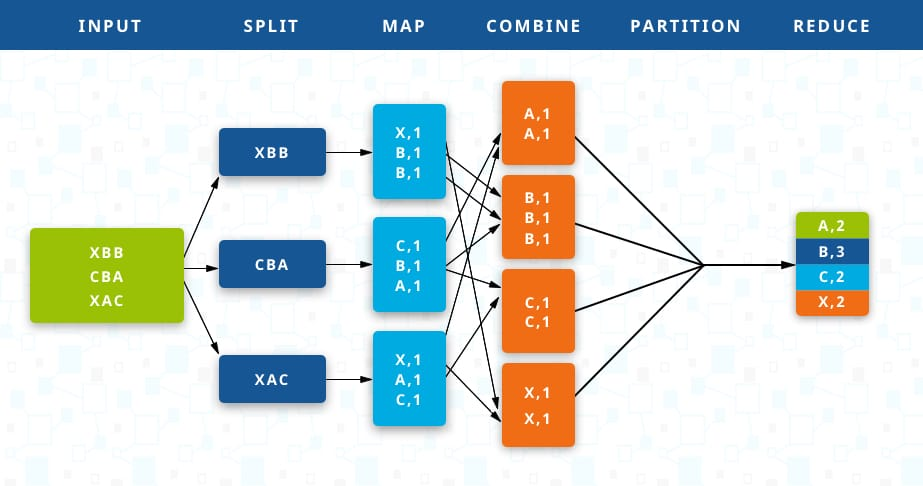

The input is split, transformed, combined and reduced in parallel. In the above example, you see a workflow in which the input is split in chunks consisting of a single line. Each line is sent to a mapper for a transformation. The mapper is supposed to “*emit*” a list of `(key, value)` tuples. The list emitted by each mapper is then recombined so that each *reducer* is supplied with a list of `value`s corresponding to the same `key`. The reducer then is free to return whatever results it is meaningful for it.

The figure refers to an example in which a counting of occurences of the single characters in some texts.

## Map/Reduce simulator

A more precise simulation of the *map/reduce* paradigm is provided through the library `map_reduce.py`, which simulates the *map/reduce* steps by performing them in parallel.

You can give a look at the file content, if you're interested in the implementation.

The `map_reduce` module can be loaded by issuing the command:

```python
from map_reduce import map_reduce
```

provided that the `map_reduce.py` is in **the same** directory as this notebook (or the notebook using it). It is not a systemwide library but a custom one.

The `map_reduce` module is a higher-order function that takes two functions as its arguments, namely the `mapper` and the `reducer`, and returns another function (call it `apply`) that has an iterable as its argument. The `apply` function will perform all the steps of the *map/reduce* pipeline, namely:

1. it will transform each item of the input iterable (in parallel) by applying the `mapper()` function to that item;
2. it will partition the results of the *map* application into blocks having the same key value;
3. it will send each block to a single `reducer()` function that performs the reduction in parallel.

You will see an example of adapting the map/reduce functions for counting words and an usage of the map reduce simulator in the following cells. The final output format is slightly different from the one above and is more similar to an actual output of a map/reduce pipeline (i.e., a list of tuples instead of a dictionary).

The signatures of the two functions is as follows:

* `mapper(item) -> list of tuples (k, v)`
* `reducer(k, list of values corresponding to key k) -> list of any type`

In [ ]:
# This will install the typeguard library that performs runtime checking of the function times, more details
# in a later lecture
!pip3 install typeguard

In [ ]:
from map_reduce import map_reduce

import string

def m(text):
    def remove_punctuation(s):
        for c in string.punctuation:
            s = s.replace(c, '')
        return s
    # the mapper emits a list of tuples (word, 1), one for each word
    return [(remove_punctuation(w), 1) for w in text.lower().strip().split()]

def r(key, data):
    # data is the list of values corresponding to the key `key`
    return (key, sum(data))

apply = map_reduce(m, r)

apply(strings)

## Exercise 7

Given a text file containing some temperature data with the following format:

```
Id,Region,Country,State,City,Month,Day,Year,AvgDailyTemperature
794485,Europe,Italy,,Milan,1,1,1995,42.2
794486,Europe,Italy,,Milan,1,2,1995,35.5
...
```

You might wonder whether the temperature reported is wrong, but it's not, it is just reported using Farenheit degrees.

We'd like to compute the minimum and maximum **monthly** temperature for **each city** using a *map/reduce* pipepline.

Define a `mapper()` function that, given one line of the file outputs a tuple whose value is the temperature converted in Celsius degrees (the formula is $°C = (°F - 32) \cdot \frac{5}{9}$) and the key is suitable for the further reduce processing (you have to choose).

Define a `reducer()` function that, given one of the keys and the list of values corresponding to that key returns the suitable value to represent both the minimum and maximum monthly temperature for each city.

You have to decide which are the keys and which are the values for both functions. The outcome should represent that information.



In [ ]:
def mapper(line):
    # decide how to transform each line so that it will get to the correct reducer
    # YOUR CODE HERE
    raise NotImplementedError()

def reducer(key, items):
    # decide how to aggregate all the data that have the same key
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
apply = map_reduce(mapper, reducer)

def read_line(l):
    t = l.strip().split(',')
    return t[4], int(t[5]), float(t[8])

with open('italian_city_temperature.csv') as f:
    f.readline() # skip the first line, which is the header
    print(apply(map(read_line, f)))

You might notice that a lot of minimum values are `-72.7777...`, which are probably missing observations (the value corresponds to a `-99.0` in the original untransformed data). How can you get rid of those wrong observations? You might do that either in the reducer.

In [ ]:
## Write a modified version of reducer so that the missing observation
## are removed

def reducer(key, items):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
apply = map_reduce(mapper, reducer)

with open('italian_city_temperature.csv') as f:
    f.readline() # skip the first line, which is the header
    print(apply(map(read_line, f)))